**Ensemble Model**
1. Imports

In [40]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline



2. Image processing


In [41]:
images = []
labels = []

data_dir = r'./asl_alphabet_train/asl_alphabet_train'
selected_letters = ['A', 'B', 'F', 'I', 'J', 'L', 'O', 'P', 'V', 'Y']
size = 100

for letter_dir in os.listdir(data_dir):
    
    # Check if the entry is a directory
    if os.path.isdir(os.path.join(data_dir, letter_dir)) and letter_dir in selected_letters:
        # Iterate over the files in the letter directory
        for file in os.listdir(os.path.join(data_dir, letter_dir)):
            # Check if the file is a jpg image
            if file.endswith('.jpg'):
                # Read the image
                image_path = os.path.join(data_dir, letter_dir, file)
                image = cv2.imread(image_path)

                # Resize, convert to grayscale, and normalize pixel values
                image_resized = cv2.resize(image, (size, size))
                image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
                image_normalized = image_gray / 255.0 

                # Extract label from filenames
                label = file[0]
                
                images.append(image_normalized)
                labels.append(label)

# Flatten the images and convert the list to a numpy array
images = np.array(images)
images = images.flatten().reshape(images.shape[0], size * size)
labels = np.array(labels)
print(images.shape)

(30000, 10000)


### SVM Model with degree: 3 and C: 1.0

In [42]:
# Use PCA for dimensionality reduction
pca = RandomizedPCA(150)
pca.fit(images)

# Compute the components and projected hands
pca = RandomizedPCA(150).fit(images)
components = pca.transform(images)
projected = pca.inverse_transform(components)

x_train, x_test, y_train, y_test = train_test_split(components, labels, random_state=0,test_size=0.25)
svc_1 = SVC(kernel='poly', degree=3, C=1.0)
svc_1.fit(x_train, y_train)
svc_y_pred = svc_1.predict(x_test)

class_report = classification_report(y_test, svc_y_pred)
print(class_report)

              precision    recall  f1-score   support

           A       0.98      0.94      0.96       723
           B       0.96      0.98      0.97       782
           F       0.97      1.00      0.98       774
           I       0.98      0.96      0.97       744
           J       0.97      0.98      0.97       772
           L       0.99      0.96      0.98       752
           O       0.92      0.95      0.94       706
           P       1.00      0.99      0.99       760
           V       0.82      0.93      0.87       714
           Y       0.95      0.84      0.89       773

    accuracy                           0.95      7500
   macro avg       0.95      0.95      0.95      7500
weighted avg       0.96      0.95      0.95      7500



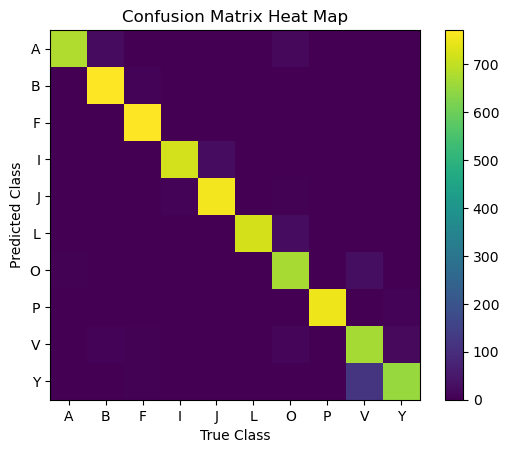

''

In [43]:
#function that you will use to convert matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

conf_matrix = confusion_matrix(y_test, svc_y_pred)
conf_matrix_to_df(conf_matrix, np.unique(labels))


plt.imshow(conf_matrix)
plt.colorbar()

plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix Heat Map')

class_names = ['A', 'B', 'F', 'I', 'J', 'L', 'O', 'P', 'V', 'Y']
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)

plt.show()


### SVM Model with degree: 4

In [44]:
# Use PCA for dimensionality reduction
pca = RandomizedPCA(150)
pca.fit(images)

# Compute the components and projected hands
pca = RandomizedPCA(150).fit(images)
components = pca.transform(images)
projected = pca.inverse_transform(components)

x_train, x_test, y_train, y_test = train_test_split(components, labels, random_state=0,test_size=0.25)
svc_2 = SVC(kernel='poly', degree=4, C=1)
svc_2.fit(x_train, y_train)
svc_y_pred = svc_2.predict(x_test)

class_report = classification_report(y_test, svc_y_pred)
print(class_report)

              precision    recall  f1-score   support

           A       0.99      0.96      0.97       723
           B       0.99      0.99      0.99       782
           F       0.99      0.97      0.98       774
           I       0.97      0.94      0.96       744
           J       0.94      0.98      0.96       772
           L       1.00      0.96      0.98       752
           O       0.85      0.98      0.91       706
           P       1.00      0.96      0.98       760
           V       0.95      0.67      0.78       714
           Y       0.79      0.97      0.87       773

    accuracy                           0.94      7500
   macro avg       0.95      0.94      0.94      7500
weighted avg       0.95      0.94      0.94      7500



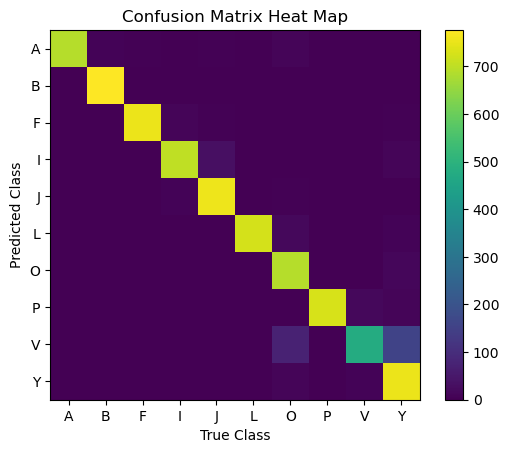

In [45]:
#function that you will use to convert matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

conf_matrix = confusion_matrix(y_test, svc_y_pred)
conf_matrix_to_df(conf_matrix, np.unique(labels))


plt.imshow(conf_matrix)
plt.colorbar()

plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix Heat Map')

class_names = ['A', 'B', 'F', 'I', 'J', 'L', 'O', 'P', 'V', 'Y']
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)

plt.show()

### Decision Tree

In [46]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_y_pred = dt.predict(x_test)

class_report = classification_report(y_test, dt_y_pred)
print(class_report)

              precision    recall  f1-score   support

           A       0.89      0.87      0.88       612
           B       0.84      0.89      0.86       576
           F       0.94      0.95      0.94       609
           I       0.97      0.97      0.97       567
           J       0.96      0.96      0.96       625
           L       0.97      0.96      0.96       595
           O       0.98      0.96      0.97       635
           P       0.99      0.99      0.99       572
           V       0.96      0.92      0.94       591
           Y       0.93      0.96      0.95       618

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



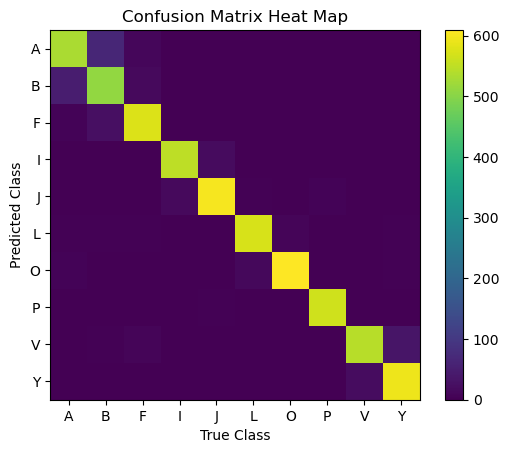

In [47]:
#function that you will use to convert matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

conf_matrix = confusion_matrix(y_test, dt_y_pred)
conf_matrix_to_df(conf_matrix, np.unique(labels))


plt.imshow(conf_matrix)
plt.colorbar()

plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix Heat Map')

class_names = ['A', 'B', 'F', 'I', 'J', 'L', 'O', 'P', 'V', 'Y']
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)

plt.show()

### Ensemble model

In [48]:
# Define PCA for SVC1 and SVC2
pca_svc1 = RandomizedPCA(n_components=150)
pca_svc2 = RandomizedPCA(n_components=150)

# Define the individual models with PCA
svc_1 = Pipeline([('pca', pca_svc1), ('svc', SVC(kernel='poly', degree=3, C=1.0))])
svc_2 = Pipeline([('pca', pca_svc2), ('svc', SVC(kernel='poly', degree=4, C=1.0))])

# Define the Decision Tree without PCA
dt = DecisionTreeClassifier()

# Create the voting ensemble
voting_ensemble = VotingClassifier(estimators=[
    ('svc_1', svc_1),
    ('svc_2', svc_2),
    ('decision_tree', dt)
], voting='hard')  # Use 'hard' voting for majority vote

# Train the ensemble model
voting_ensemble.fit(x_train, y_train)

# Predictions
ensemble_y_pred = voting_ensemble.predict(x_test)
print(classification_report(y_test, ensemble_y_pred))

              precision    recall  f1-score   support

           A       0.97      0.97      0.97       612
           B       0.98      0.99      0.98       576
           F       0.99      1.00      1.00       609
           I       0.99      0.98      0.98       567
           J       0.98      0.98      0.98       625
           L       1.00      0.98      0.99       595
           O       0.95      0.99      0.97       635
           P       1.00      0.98      0.99       572
           V       0.98      0.93      0.95       591
           Y       0.96      0.99      0.97       618

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



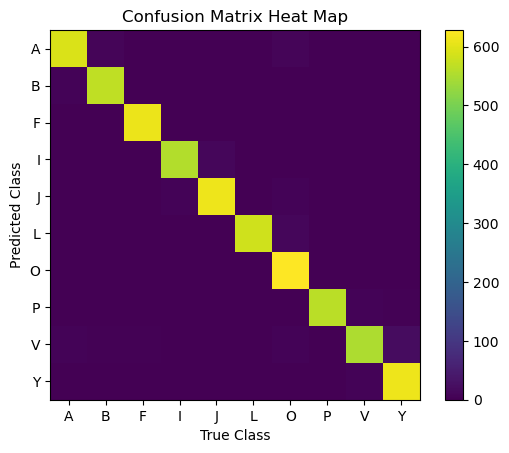

In [49]:
#function that you will use to convert matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

conf_matrix = confusion_matrix(y_test, ensemble_y_pred)
#conf_matrix_to_df(conf_matrix, np.unique(labels))


plt.imshow(conf_matrix)
plt.colorbar()

plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix Heat Map')

class_names = ['A', 'B', 'F', 'I', 'J', 'L', 'O', 'P', 'V', 'Y']
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)

plt.show()
